In [ ]:
minimum_people = 4
maximum_people = 30

In [ ]:
from math import sqrt

def rectangle_table_distance(seat_distance, screaming_distance, people, verbose=False):
  if people % 2 == 1:
    raise Exception("Seats only pairs")

  distance = 0
  in_distance = 0

  # the person in front of you is in distance
  if screaming_distance <= 0.8:
    in_distance += 1

  for p in range(2, int(people / 2) + 1):
    delta = p - 1

    # same side
    d1 = delta * seat_distance

    if d1 <= screaming_distance:
      in_distance += 1

    # other side
    d2 = sqrt((delta * seat_distance) ** 2 + 0.8 ** 2)

    if verbose:
      print(f"Dist to {p} is delta={delta}")

    if d2 <= screaming_distance:
      in_distance += 1

    distance += d1 + d2

  return distance, in_distance + 1

In [ ]:
seat_distance = 0.8
screaming_distance = 3

print(4, rectangle_table_distance(seat_distance, screaming_distance, 4, verbose=True))
print(6, rectangle_table_distance(seat_distance, screaming_distance, 6, verbose=True))

Dist to 2 is delta=1
4 (1.9313708498984763, 3)
Dist to 2 is delta=1
Dist to 3 is delta=2
6 (5.320225231898308, 5)


In [ ]:
from math import pi, sin

def round_table_distance(seat_distance, screaming_distance, people, verbose=False):
  if people % 2 == 1:
    raise Exception("Seats only pairs")
  
  two_pi_r = seat_distance * people
  r = two_pi_r / (2 * pi)

  theta = (2 * pi) / people

  if verbose:
    print(f"people={people} R={r} pi={pi} theta={theta}")

  distance = 0
  in_distance = 0

  for p in range(2, people + 1):
    delta = p - 1
    # https://www.quora.com/How-does-one-calculate-the-straight-line-distance-between-two-points-on-a-circle-if-the-radius-and-arc-length-are-known
    p_theta = theta * delta
    a = r * p_theta
    d = 2 * r * sin(a / (2 * r))

    if d <= screaming_distance:
      in_distance += 1

    if verbose:
      print(f"Dist to {p} is delta={delta} p_theta={p_theta} a={a} d={d}")
    distance += d

  return distance, in_distance

In [ ]:
print(4, round_table_distance(seat_distance, screaming_distance, 4, verbose=True))
print(6, round_table_distance(seat_distance, screaming_distance, 6, verbose=True))

people=4 R=0.5092958178940651 pi=3.141592653589793 theta=1.5707963267948966
Dist to 2 is delta=1 p_theta=1.5707963267948966 a=0.7999999999999999 d=0.7202530529256848
Dist to 3 is delta=2 p_theta=3.141592653589793 a=1.5999999999999999 d=1.0185916357881302
Dist to 4 is delta=3 p_theta=4.71238898038469 a=2.4 d=0.7202530529256849
4 (2.4590977416395, 3)
people=6 R=0.7639437268410978 pi=3.141592653589793 theta=1.0471975511965976
Dist to 2 is delta=1 p_theta=1.0471975511965976 a=0.8000000000000002 d=0.7639437268410977
Dist to 3 is delta=2 p_theta=2.0943951023931953 a=1.6000000000000003 d=1.3231893490123012
Dist to 4 is delta=3 p_theta=3.141592653589793 a=2.4000000000000004 d=1.5278874536821956
Dist to 5 is delta=4 p_theta=4.1887902047863905 a=3.2000000000000006 d=1.3231893490123012
Dist to 6 is delta=5 p_theta=5.235987755982988 a=4.0 d=0.7639437268410983
6 (5.702153605388994, 5)


In [ ]:
# variando o numero de pessoas
import pandas as pd

def parse_for(screaming_distance):
  results = []
  for p in range(minimum_people, maximum_people + 1, 2):
    rec = rectangle_table_distance(seat_distance, screaming_distance, p)
    rou = round_table_distance(seat_distance, screaming_distance, p)
    results.append([p, "rectangle", *rec])
    results.append([p, "round", *rou])
  results = pd.DataFrame(results, columns=["people", "form", "distance", "scream"])
  return results

results = parse_for(screaming_distance)
results.head()

,people,form,distance,scream
0,4,rectangle,1.931371,3
1,4,round,2.459098,3
2,6,rectangle,5.320225,5
3,6,round,5.702154,5
4,8,rectangle,10.250047,7


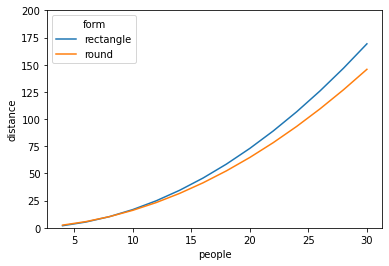

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=results, x="people", y="distance", hue="form")
plt.ylim(0, 200)
plt.show()


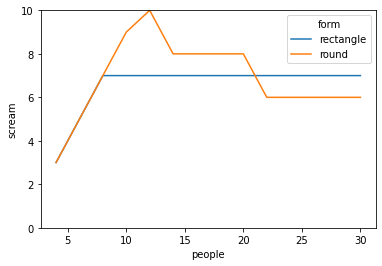

In [ ]:
sns.lineplot(data=results, x="people", y="scream", hue="form")
plt.ylim(0,10)
plt.show()

In [ ]:
results = parse_for(2)
results.head()

,people,form,distance,scream
0,4,rectangle,1.931371,3
1,4,round,2.459098,3
2,6,rectangle,5.320225,5
3,6,round,5.702154,5
4,8,rectangle,10.250047,5


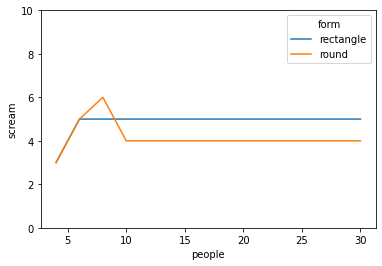

In [ ]:
sns.lineplot(data=results, x="people", y="scream", hue="form")
plt.ylim(0,10)
plt.show()